In [1]:
import sys, os, glob, time
import numpy as np
import matplotlib.pyplot as plt
import fitsio

In [2]:
sys.path.append('../py') #this works if you are in the LSS/Sandbox directory, check with os.getcwd()

In [3]:
from LSS.imaging  import densvar

256 True


In [29]:
import importlib

In [31]:
importlib.reload(densvar)

256 True


<module 'LSS.imaging.densvar' from '../py/LSS/imaging/densvar.py'>

In [4]:
version = 'test'
tarver = '0.49.0'
sdir = os.environ['CSCRATCH']+'/tarcat/v'+version+'/tv'+tarver+'/'

# The below files were created from files produced by desitarget, using https://github.com/desihub/LSS/blob/master/bin/mkCat_tar4ang.py

In [79]:
fr = fitsio.read('/global/cscratch1/sd/ajross/tarcat/vtest/tv0.49.0/randomsDR9v0.49.0_0_masked.fits')

In [90]:
fd = fitsio.read('/global/cscratch1/sd/ajross/tarcat/vtest/tv0.50.0/LRG_OPTsv1targetsDR9v0.50.0_masked.fits')

In [91]:
fdf = fitsio.read('/global/cscratch1/sd/ajross/tarcat/vtest/tv0.50.0/LRG_IRsv1targetsDR9v0.50.0_masked.fits')

randoms done
data done


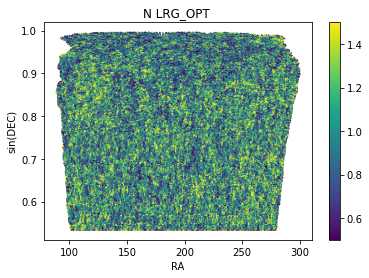

randoms done
data done


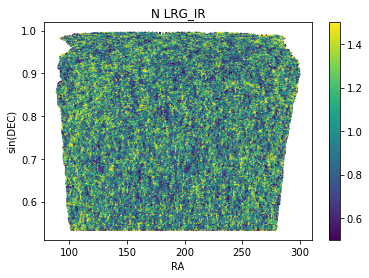

randoms done
data done


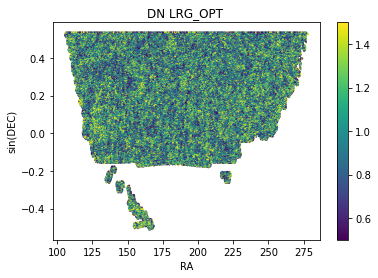

randoms done
data done


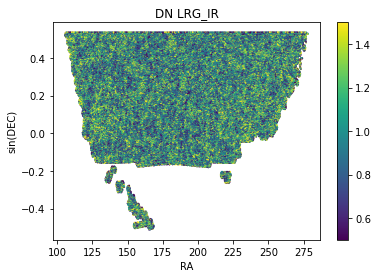

randoms done
data done


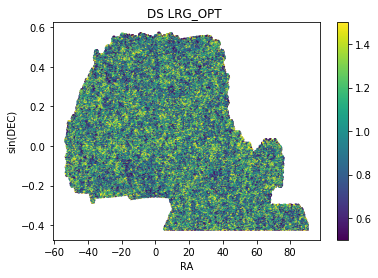

randoms done
data done


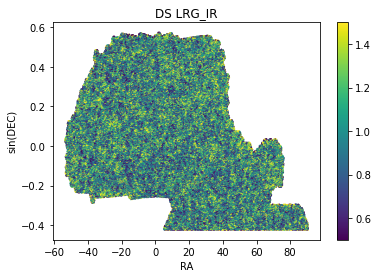

In [92]:
regl = ['N','DN','DS']
for reg in regl:
    densvar.plot_hpdens(fr,fd,reg,titl=reg+' LRG_OPT ')
    densvar.plot_hpdens(fr,fdf,reg,titl=reg+' LRG_IR')

randoms done
data done
97717
97717


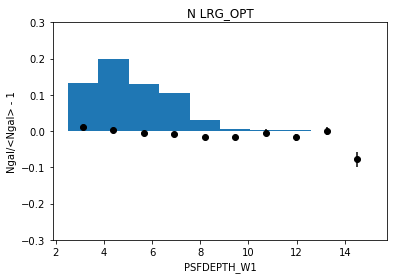

fraction of randoms not included in plot: 9.043867897865955e-05
randoms done
data done
97717
97717


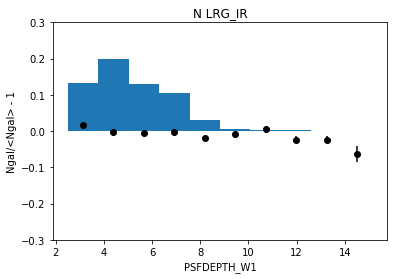

fraction of randoms not included in plot: 9.043867897865955e-05


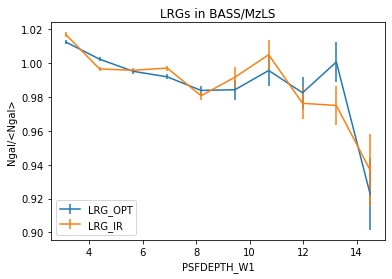

randoms done
data done
113630
113630


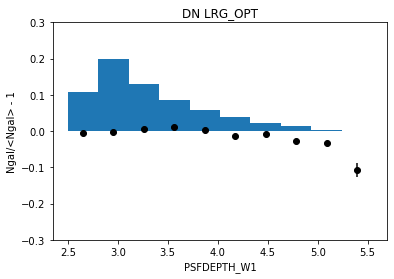

fraction of randoms not included in plot: 0.006692562187861238
randoms done
data done
113630
113630


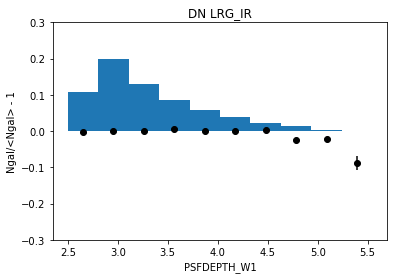

fraction of randoms not included in plot: 0.006692562187861238


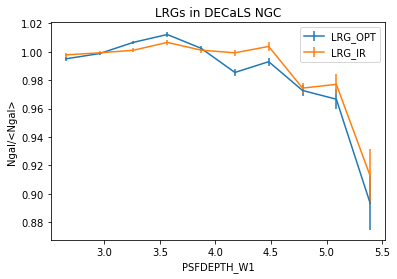

randoms done
data done
102271
102271


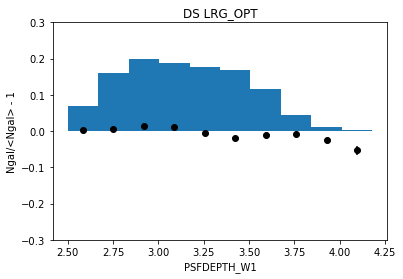

fraction of randoms not included in plot: 0.014699293377630483
randoms done
data done
102271
102271


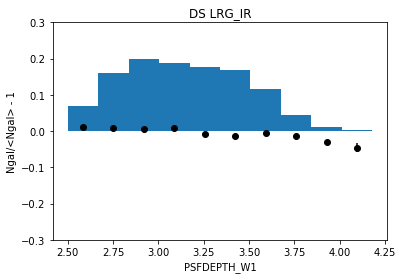

fraction of randoms not included in plot: 0.014699293377630483


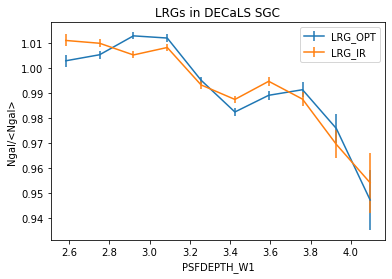

randoms done
data done
97717
97717


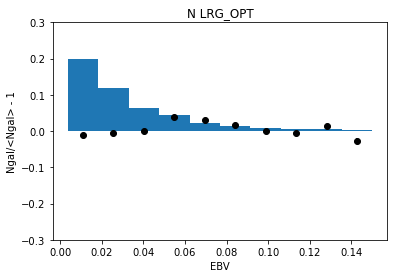

fraction of randoms not included in plot: 0.010202270901526323
randoms done
data done
97717
97717


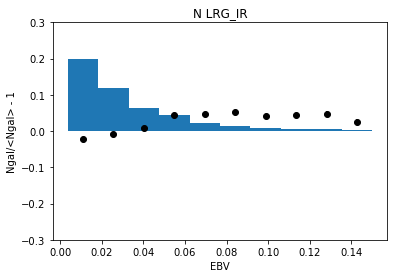

fraction of randoms not included in plot: 0.010202270901526323


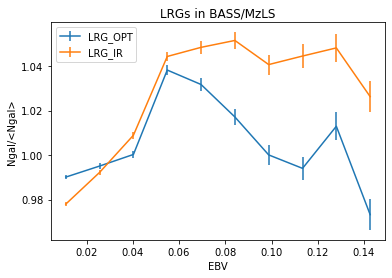

randoms done
data done
113630
113630


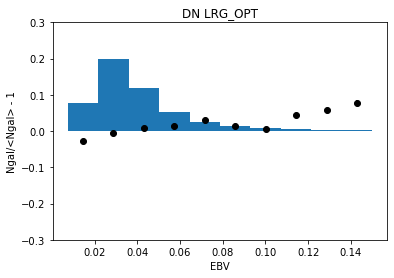

fraction of randoms not included in plot: 0.0060018369866483064
randoms done
data done
113630
113630


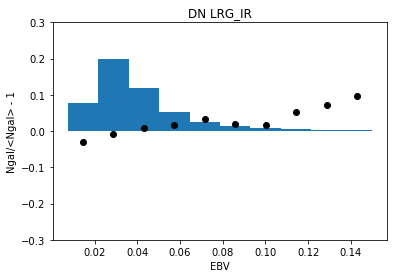

fraction of randoms not included in plot: 0.0060018369866483064


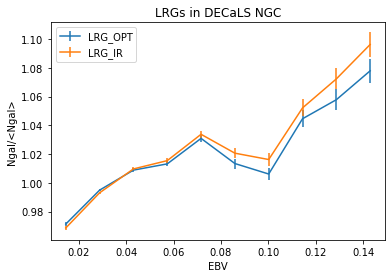

randoms done
data done
102271
102271


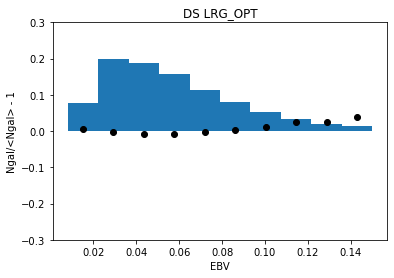

fraction of randoms not included in plot: 0.03135138218105747
randoms done
data done
102271
102271


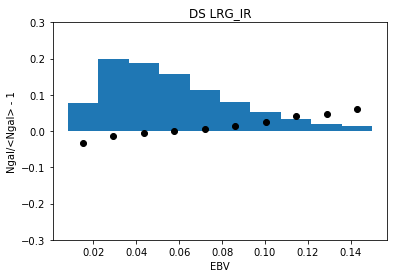

fraction of randoms not included in plot: 0.03135138218105747


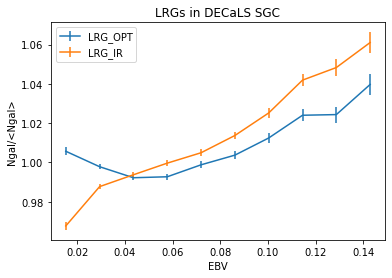

randoms done
data done
97717
97717


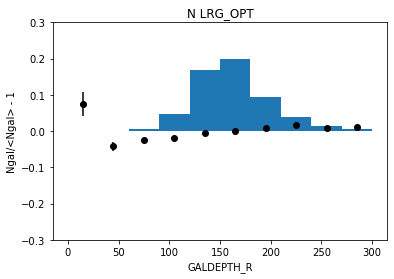

fraction of randoms not included in plot: 0.007278258233259852
randoms done
data done
97717
97717


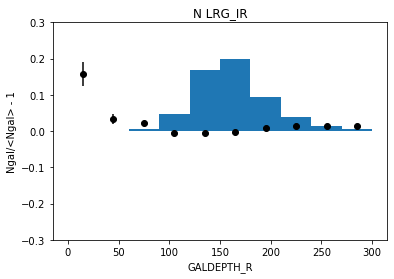

fraction of randoms not included in plot: 0.007278258233259852


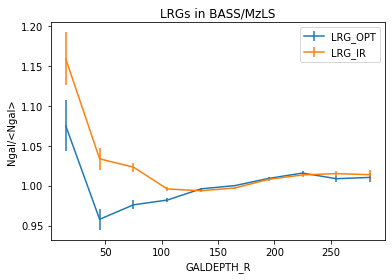

randoms done
data done
113630
113630


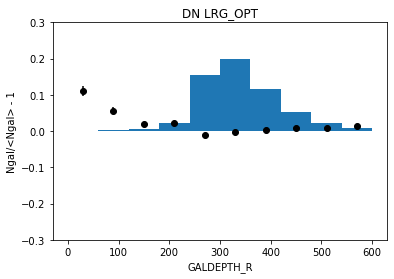

fraction of randoms not included in plot: 0.01695270791684524
randoms done
data done
113630
113630


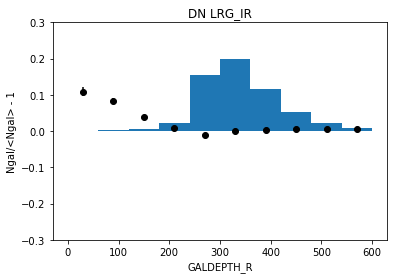

fraction of randoms not included in plot: 0.01695270791684524


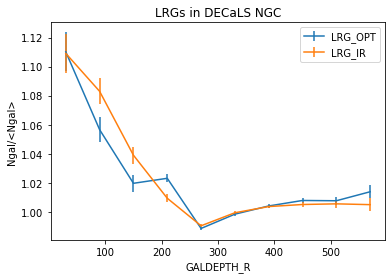

randoms done
data done
102271
102271


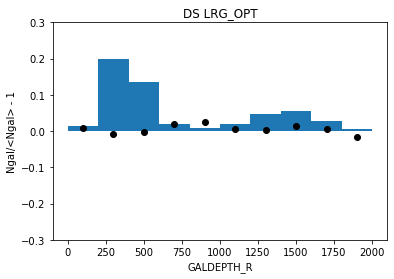

fraction of randoms not included in plot: 0.0063972851360792945
randoms done
data done
102271
102271


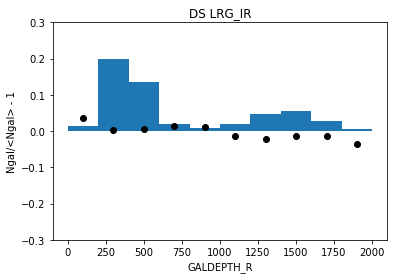

fraction of randoms not included in plot: 0.0063972851360792945


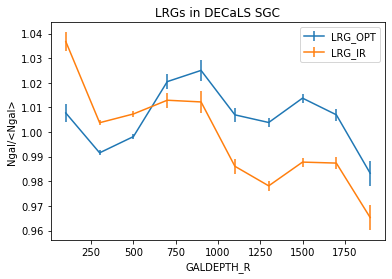

randoms done
data done
97717
97717


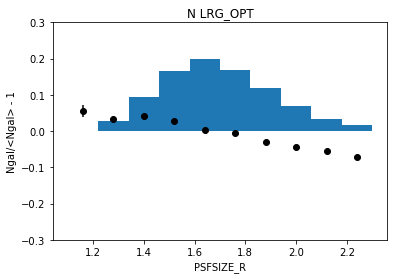

fraction of randoms not included in plot: 0.012295121278611081
randoms done
data done
97717
97717


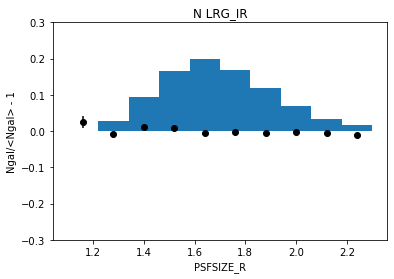

fraction of randoms not included in plot: 0.012295121278611081


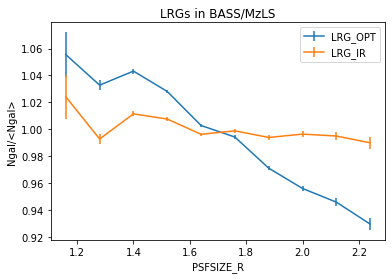

randoms done
data done
113630
113630


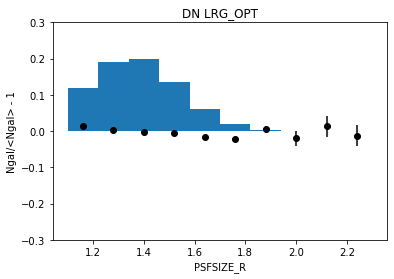

fraction of randoms not included in plot: 0.029232642581191806
randoms done
data done
113630
113630


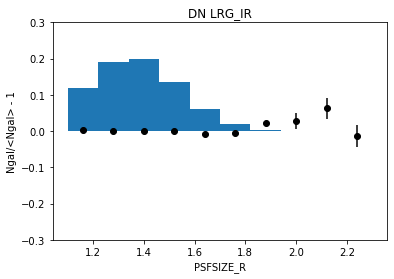

fraction of randoms not included in plot: 0.029232642581191806


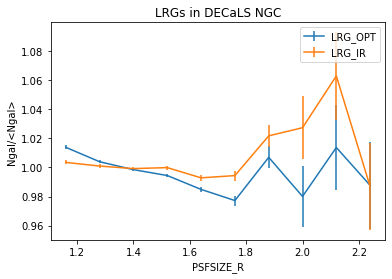

randoms done
data done
102271
102271


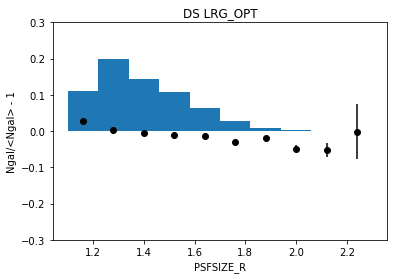

fraction of randoms not included in plot: 0.015927093030124642
randoms done
data done
102271
102271


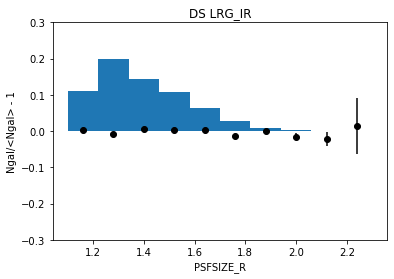

fraction of randoms not included in plot: 0.015927093030124642


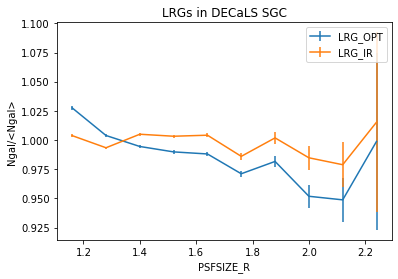

randoms done
data done
97717
97717


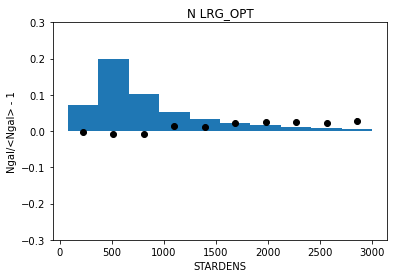

fraction of randoms not included in plot: 0.021071955273962394
randoms done
data done
97717
97717


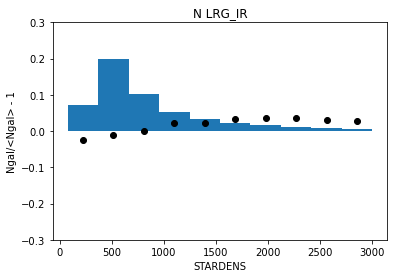

fraction of randoms not included in plot: 0.021071955273962394


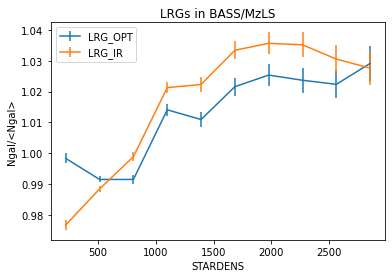

randoms done
data done
113630
113630


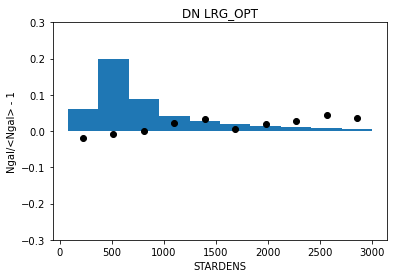

fraction of randoms not included in plot: 0.010543019042958023
randoms done
data done
113630
113630


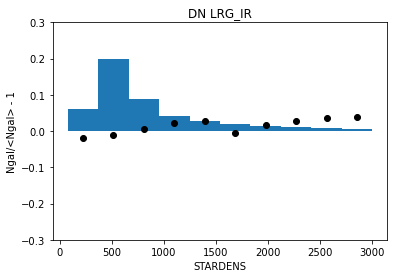

fraction of randoms not included in plot: 0.010543019042958023


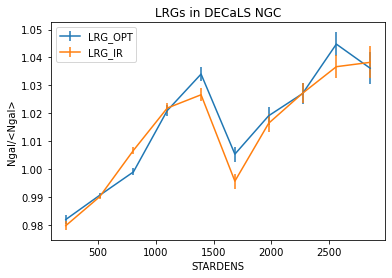

randoms done
data done
102271
102271


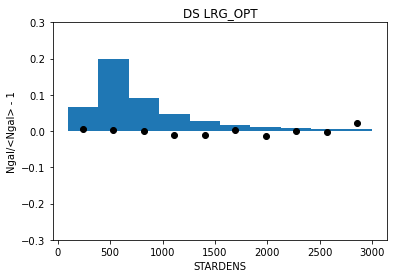

fraction of randoms not included in plot: 0.011255359758171785
randoms done
data done
102271
102271


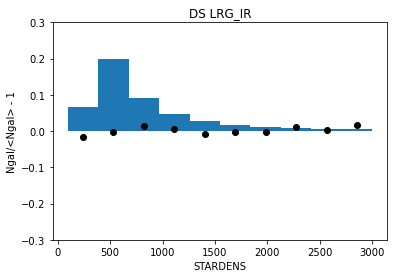

fraction of randoms not included in plot: 0.011255359758171785


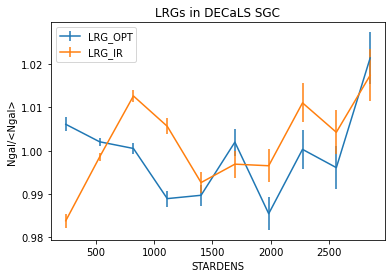

In [95]:
parl = ['PSFDEPTH_W1','EBV','GALDEPTH_R','PSFSIZE_R','STARDENS']
for par in parl:
    vmax = None
    vmin = None
    if par == 'EBV':
        vmax = 0.15
    if par == 'STARDENS':
        vmax = 3000
    if par == 'PSFSIZE_R':    
        vmin = 1.1
        vmax = 2.3
    #if par == 'GALDEPTH_R':
    #    vmin = 200
    if par == 'PSFDEPTH_W1':
        vmin = 2.5
    for reg in regl:
        if par == 'GALDEPTH_R':
            if reg == 'N':
                vmax = 300
            if reg == 'DN':
                vmax = 600
            if reg == 'DS':
                vmax = 2000
        bc,sv,ep = densvar.densvsimpar_pix(fr,fd,par,reg=reg,xlab=par,titl=reg+' LRG_OPT',vmax=vmax,vmin=vmin)
        bcf,svf,epf = densvar.densvsimpar_pix(fr,fdf,par,reg=reg,xlab=par,titl=reg+' LRG_IR',vmax=vmax,vmin=vmin)
        plt.errorbar(bc,sv,ep,label='LRG_OPT')
        plt.errorbar(bcf,svf,epf,label='LRG_IR')
        plt.legend()
        if reg == 'N':
            plt.title('LRGs in BASS/MzLS')
        if reg == 'DN':
            plt.title('LRGs in DECaLS NGC')
        if reg == 'DS':
            plt.title('LRGs in DECaLS SGC')
        plt.xlabel(par)
        plt.ylabel('Ngal/<Ngal>')
        plt.show()

# look at distributions with different morpthtype

0.010990357334590186 fraction of sample
randoms done


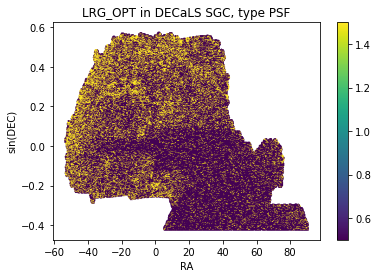

In [98]:
selg = fd['MORPHTYPE'] == 'PSF'
print(str(len(fd[selg])/len(fd))+' fraction of sample')
densvar.plot_hpdensnc(fr,fd[selg],reg='DS',titl='LRG_OPT in DECaLS SGC, type PSF')

0.2270129740738191 fraction of sample
randoms done


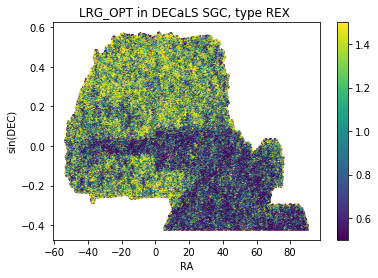

In [99]:
selg = fd['MORPHTYPE'] == 'REX'
print(str(len(fd[selg])/len(fd))+' fraction of sample')
densvar.plot_hpdensnc(fr,fd[selg],reg='DS',titl='LRG_OPT in DECaLS SGC, type REX ')

0.0341291514044516 fraction of sample
randoms done


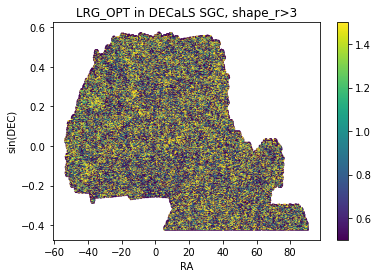

371328


In [100]:
selg = fd['SHAPE_R'] > 3
print(str(len(fd[selg])/len(fd))+' fraction of sample')
densvar.plot_hpdensnc(fr,fd[selg],reg='DS',titl='LRG_OPT in DECaLS SGC, shape_r>3')


0.04740873759878486 fraction of sample
randoms done


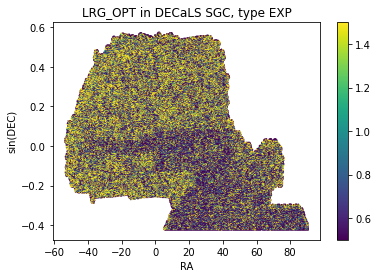

In [101]:
selg = fd['MORPHTYPE'] == 'EXP'
print(str(len(fd[selg])/len(fd))+' fraction of sample')
densvar.plot_hpdensnc(fr,fd[selg],reg='DS',titl='LRG_OPT in DECaLS SGC, type EXP')

0.5354770731068872 fraction of sample
randoms done


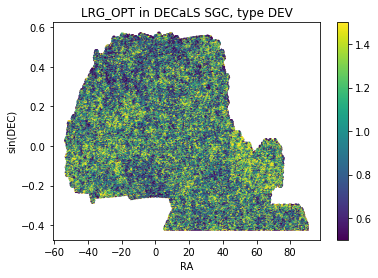

In [102]:
selg = fd['MORPHTYPE'] == 'DEV'
print(str(len(fd[selg])/len(fd))+' fraction of sample')
densvar.plot_hpdensnc(fr,fd[selg],reg='DS',titl='LRG_OPT in DECaLS SGC, type DEV')

0.1791108578859187 fraction of sample
randoms done


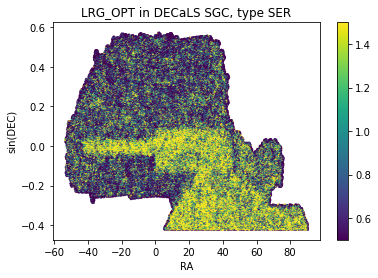

In [103]:
selg = fd['MORPHTYPE'] == 'SER'
print(str(len(fd[selg])/len(fd))+' fraction of sample')
densvar.plot_hpdensnc(fr,fd[selg],reg='DS',titl='LRG_OPT in DECaLS SGC, type SER')